# HW 1-1

In [1]:
#Imports
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

Simulate a Function

In [2]:
#GT Function
def GT_function (x):
  return (np.sin(5*np.pi*x))/(5*np.pi*x)

#Dataset
x_train = np.linspace(-1, 1, 500)
y_train=GT_function(x_train)

#Convert to Tensors
x_train_tensor= torch.FloatTensor(x_train).unsqueeze(1)
y_train_tensor= torch.FloatTensor(y_train).unsqueeze(1)

In [3]:
#Shallow Model (1089 parameters)
class Model0(nn.Module):
  def __init__(self):
    super(Model0, self).__init__()
    self.fc1 = nn.Linear(1, 50)
    self.fc2 = nn.Linear(50,19)
    self.fc3 = nn.Linear(19,1)


  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x =self.fc3(x)
    return x

#Deep Model 1 (1093 parameters)
class Model1(nn.Module):
  def __init__(self):
    super(Model1, self).__init__()
    self.fc1 = nn.Linear(1, 37)
    self.fc2 = nn.Linear(37, 20)
    self.fc3 = nn.Linear(20,10)
    self.fc4 = nn.Linear(10,4)
    self.fc5 = nn.Linear(4,1)


  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = self.fc5(x)
    return x

#Deep Model 2 (1091 parameters)
class Model2(nn.Module):
  def __init__(self):
    super(Model2, self).__init__()
    self.fc1 = nn.Linear(1, 20)
    self.fc2 = nn.Linear(20, 20)
    self.fc3 = nn.Linear(20,10)
    self.fc4 = nn.Linear(10, 10)
    self.fc5 = nn.Linear(10, 10)
    self.fc6 = nn.Linear(10, 10)
    self.fc7 = nn.Linear(10, 5)
    self.fc8 = nn.Linear(5, 5)
    self.fc9 = nn.Linear(5, 1)

    self.init_weights()

  def init_weights(self):
      for layer in self.children():
          if isinstance(layer, nn.Linear):
              nn.init.xavier_uniform_(layer.weight)
              nn.init.zeros_(layer.bias)

  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = torch.relu(self.fc5(x))
    x = torch.relu(self.fc6(x))
    x = torch.relu(self.fc7(x))
    x = torch.relu(self.fc8(x))
    x = self.fc9(x)
    return x

shallowModel = Model0()
deepModel1 = Model1()
deepModel2 = Model2()

In [4]:
#Loss and Optimizers
lossFunction = nn.MSELoss()
shallowOptimizer = optim.Adam(shallowModel.parameters(),lr=0.005)
deepOptimizer1 = optim.Adam(deepModel1.parameters(), lr=0.005)
deepOptimizer2 = optim.Adam(deepModel2.parameters(), lr=0.005)

In [5]:
#Train
epochs = 20000
shallowLoss = []
deepLoss1 = []
deepLoss2 = []

for x in range(epochs):
  #Shalllow Train
  shallowModel.train()
  shallowOptimizer.zero_grad()
  shallowOutput = shallowModel(x_train_tensor)
  sLoss = lossFunction(shallowOutput, y_train_tensor)
  sLoss.backward()
  shallowOptimizer.step()
  shallowLoss.append(sLoss.item())

  #Deep Train 1
  deepModel1.train()
  deepOptimizer1.zero_grad()
  deepOutput1 = deepModel1(x_train_tensor)
  dLoss1 = lossFunction(deepOutput1, y_train_tensor)
  dLoss1.backward()
  deepOptimizer1.step()
  deepLoss1.append(dLoss1.item())

   #Deep Train 2
  deepModel2.train()
  deepOptimizer2.zero_grad()
  deepOutput2 = deepModel2(x_train_tensor)
  dLoss2 = lossFunction(deepOutput2, y_train_tensor)
  dLoss2.backward()
  deepOptimizer2.step()
  deepLoss2.append(dLoss2.item())

  if x % 100 == 0:
        print(f'Epoch {x}/{epochs}, Model 0 Loss: {sLoss.item()}, Model 1 Loss: {dLoss1.item()}, Model 2 Loss: {dLoss2.item()}')

Epoch 0/20000, Model 0 Loss: 0.27179110050201416, Model 1 Loss: 0.10810536891222, Model 2 Loss: 0.09791535139083862
Epoch 100/20000, Model 0 Loss: 0.0406256802380085, Model 1 Loss: 0.007481164298951626, Model 2 Loss: 0.08700474351644516
Epoch 200/20000, Model 0 Loss: 0.006450496148318052, Model 1 Loss: 0.0074430592358112335, Model 2 Loss: 0.08700472861528397
Epoch 300/20000, Model 0 Loss: 0.0051142266020178795, Model 1 Loss: 0.007441592402756214, Model 2 Loss: 0.08700473606586456
Epoch 400/20000, Model 0 Loss: 0.0042094276286661625, Model 1 Loss: 0.007441053166985512, Model 2 Loss: 0.08700473606586456
Epoch 500/20000, Model 0 Loss: 0.0031895595602691174, Model 1 Loss: 0.0074408347718417645, Model 2 Loss: 0.08700473606586456
Epoch 600/20000, Model 0 Loss: 0.0025081168860197067, Model 1 Loss: 0.007441271096467972, Model 2 Loss: 0.08700473606586456
Epoch 700/20000, Model 0 Loss: 0.0020787199027836323, Model 1 Loss: 0.0074429986998438835, Model 2 Loss: 0.08700473606586456
Epoch 800/20000, 

Epoch 6600/20000, Model 0 Loss: 0.00023284788767341524, Model 1 Loss: 0.0074402145110070705, Model 2 Loss: 0.08700472861528397
Epoch 6700/20000, Model 0 Loss: 0.00021840757108293474, Model 1 Loss: 0.007442522328346968, Model 2 Loss: 0.08700473606586456
Epoch 6800/20000, Model 0 Loss: 0.00021735267364419997, Model 1 Loss: 0.007447113282978535, Model 2 Loss: 0.08700472861528397
Epoch 6900/20000, Model 0 Loss: 0.00021813347120769322, Model 1 Loss: 0.007440501824021339, Model 2 Loss: 0.08700472861528397
Epoch 7000/20000, Model 0 Loss: 0.0002159261202905327, Model 1 Loss: 0.00744049483910203, Model 2 Loss: 0.08700472861528397
Epoch 7100/20000, Model 0 Loss: 0.00022337230620905757, Model 1 Loss: 0.007447033189237118, Model 2 Loss: 0.08700473606586456
Epoch 7200/20000, Model 0 Loss: 0.00021534472762141377, Model 1 Loss: 0.007440174929797649, Model 2 Loss: 0.08700473606586456
Epoch 7300/20000, Model 0 Loss: 0.00043744369759224355, Model 1 Loss: 0.0074410648085176945, Model 2 Loss: 0.0870047286

Epoch 13100/20000, Model 0 Loss: 0.0001812383852666244, Model 1 Loss: 0.00744033046066761, Model 2 Loss: 0.08700472861528397
Epoch 13200/20000, Model 0 Loss: 3.3118318242486566e-05, Model 1 Loss: 0.007441777270287275, Model 2 Loss: 0.08700472861528397
Epoch 13300/20000, Model 0 Loss: 3.1929725082591176e-05, Model 1 Loss: 0.007442406844347715, Model 2 Loss: 0.08700473606586456
Epoch 13400/20000, Model 0 Loss: 3.377649773028679e-05, Model 1 Loss: 0.00744489673525095, Model 2 Loss: 0.08700472861528397
Epoch 13500/20000, Model 0 Loss: 3.239336729166098e-05, Model 1 Loss: 0.007441685535013676, Model 2 Loss: 0.08700477331876755
Epoch 13600/20000, Model 0 Loss: 7.076388283167034e-05, Model 1 Loss: 0.007442005909979343, Model 2 Loss: 0.08700473606586456
Epoch 13700/20000, Model 0 Loss: 3.2150634069694206e-05, Model 1 Loss: 0.007446802221238613, Model 2 Loss: 0.08700474351644516
Epoch 13800/20000, Model 0 Loss: 0.00031084701186046004, Model 1 Loss: 0.007441401947289705, Model 2 Loss: 0.08700473

Epoch 19600/20000, Model 0 Loss: 7.183501293184236e-05, Model 1 Loss: 0.007441118825227022, Model 2 Loss: 0.08700472861528397
Epoch 19700/20000, Model 0 Loss: 2.7008461984223686e-05, Model 1 Loss: 0.0074399844743311405, Model 2 Loss: 0.08700473606586456
Epoch 19800/20000, Model 0 Loss: 4.4274405809119344e-05, Model 1 Loss: 0.007440052926540375, Model 2 Loss: 0.08700474351644516
Epoch 19900/20000, Model 0 Loss: 2.65569869952742e-05, Model 1 Loss: 0.007441939786076546, Model 2 Loss: 0.08700473606586456


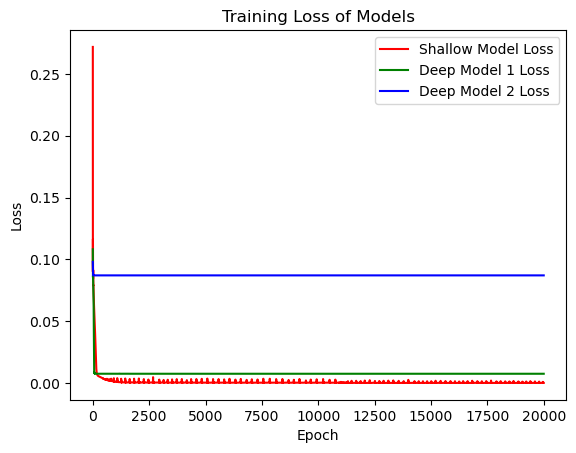

In [6]:
shallowLoss = np.array(shallowLoss)
deepLoss1 = np.array(deepLoss1)
deepLoss2 = np.array(deepLoss2)
n_epochs = np.arange(1, epochs + 1)

# Plotting
plt.plot(n_epochs, shallowLoss, 'r', label='Shallow Model Loss')
plt.plot(n_epochs, deepLoss1, 'g', label='Deep Model 1 Loss')
plt.plot(n_epochs, deepLoss2, 'b', label='Deep Model 2 Loss')
plt.title('Training Loss of Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

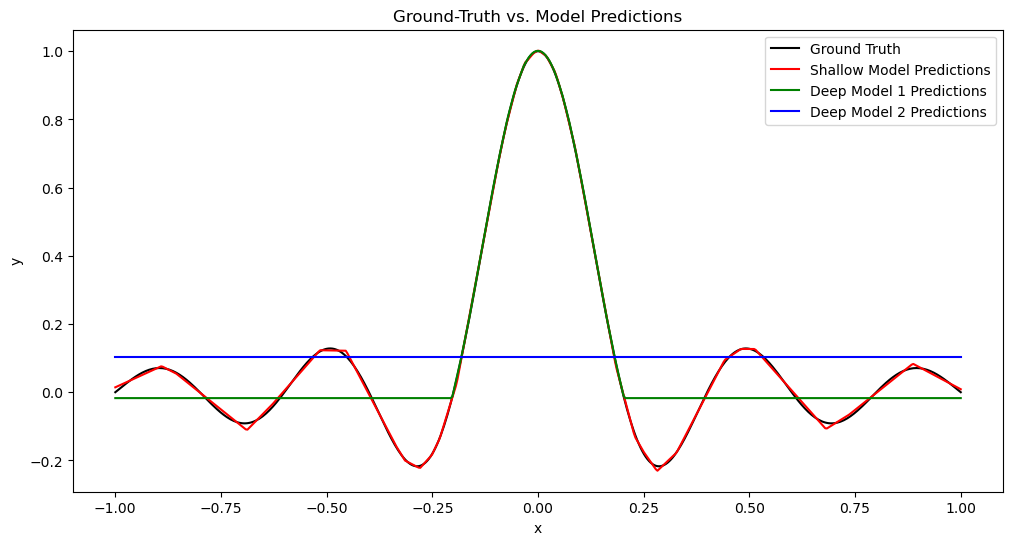

In [7]:
with torch.no_grad():
    shallow_model_predictions = shallowModel(x_train_tensor).cpu().numpy()
    deep_model1_predictions = deepModel1(x_train_tensor).cpu().numpy()
    deep_model2_predictions = deepModel2(x_train_tensor).cpu().numpy()

# Plotting
plt.figure(figsize=(12, 6))

# Ground-truth
plt.plot(x_train, y_train, 'k', label='Ground Truth')

# Shallow Model Predictions
plt.plot(x_train, shallow_model_predictions, 'r', label='Shallow Model Predictions')

# Deep Model 1 Predictions
plt.plot(x_train, deep_model1_predictions, 'g', label='Deep Model 1 Predictions')

# Deep Model 2 Predictions
plt.plot(x_train, deep_model2_predictions, 'b', label='Deep Model 2 Predictions')

plt.title('Ground-Truth vs. Model Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Train on Actual Tasks

In [8]:
#Imports
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import torch.optim as optim

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████| 9912422/9912422 [00:00<00:00, 19413351.51it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████| 28881/28881 [00:00<00:00, 1365786.41it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 2970146.64it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 1020873.95it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



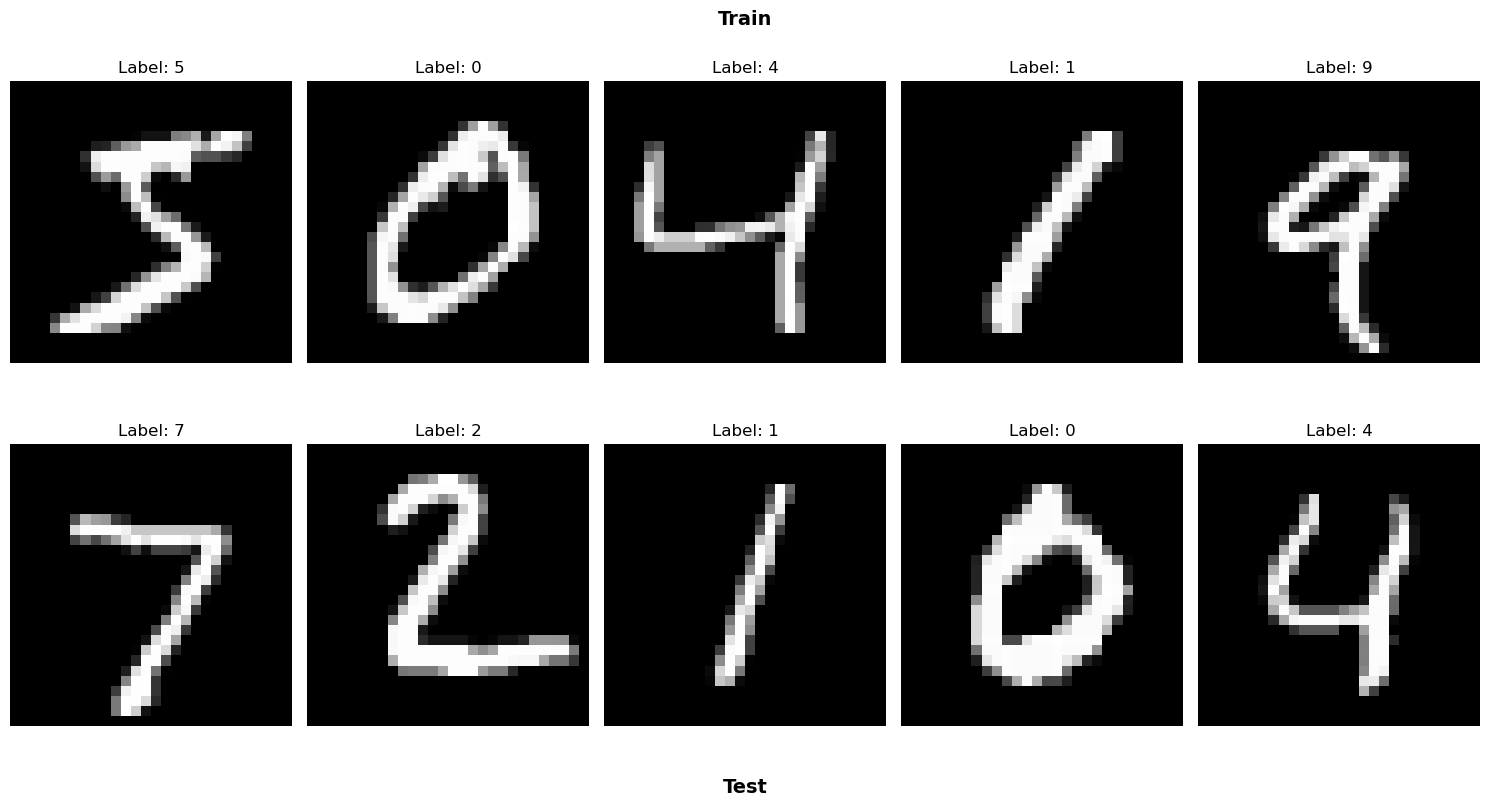

In [9]:
# Transform
transform = transforms.Compose([transforms.ToTensor()])

# Train Data
train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Train Data Loader
train_loader = torch.utils.data.DataLoader(train, batch_size=300, shuffle=False)

# Test Data
test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Test Data Loader
test_loader = torch.utils.data.DataLoader(test, batch_size=100, shuffle=False)

# Display Images
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

train_iter = iter(train_loader)
images, labels = next(train_iter)

# Print the first few images in a row
for i in range (5):
    axes[0, i].imshow(images[i].squeeze(), cmap='gray')
    axes[0, i].set_title(f"Label: {labels[i].item()}")
    axes[0, i].axis('off')

test_iter = iter(test_loader)
images, labels = next(test_iter)

for i in range (5):
    axes[1, i].imshow(images[i].squeeze(), cmap='gray')
    axes[1, i].set_title(f"Label: {labels[i].item()}")
    axes[1, i].axis('off')

fig.text(0.5, 0.98, 'Train', ha='center', va='center', fontsize=14, fontweight='bold')
fig.text(0.5, 0.02, 'Test', ha='center', va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [10]:
print("Train Data: ", len(train))
print("Test Data: ", len(test))

Train Data:  60000
Test Data:  10000


In [11]:
#Building Models

class CNN1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 5, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 13 * 13, 160)
        self.fc2 = nn.Linear(160, 10)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


net1 = CNN1() #cnn with 1 hidden layer and 16 dimensions

class CNN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 5, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 16, 5, padding=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 160)
        self.fc2 = nn.Linear(160, 16)
        self.fc3 = nn.Linear(16, 10)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net2 = CNN2() #cnn with 2 hidden layers and 16 dimensions

In [12]:
lossFunction1 = nn.CrossEntropyLoss()
optimizer1 = optim.SGD(net1.parameters(), lr=0.001, momentum=0.9)

lossFunction2 = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)

In [13]:
#Train
num_epoch=30
avgLosses1=[]
avgLosses2=[]
avgAccs1=[]
avgAccs2=[]

for epoch in range(num_epoch):
  net1.train()
  net2.train()
  cnn1Loss = []
  cnn2Loss = []
  cnn1Acc = []
  cnn2Acc = []
  n_correct1 = 0
  n_samples1 = 0
  n_correct2 = 0
  n_samples2 = 0

  for x, (imgs,labels) in enumerate(train_loader):
    #CNN1 Train
    optimizer1.zero_grad()
    cnn1Output = net1(imgs)
    loss1 = lossFunction1(cnn1Output, labels)
    loss1.backward()
    optimizer1.step()
    cnn1Loss.append(loss1.item())

    _, prediction1 = torch.max(cnn1Output.data, 1)
    n_samples1 += labels.size(0)
    n_correct1 += (prediction1 == labels).sum().item()
    acc1 = 100.0 * n_correct1 / n_samples1
    cnn1Acc.append(acc1)

    #CNN2 Train
    optimizer2.zero_grad()
    cnn2Output = net2(imgs)
    loss2 = lossFunction2(cnn2Output, labels)
    loss2.backward()
    optimizer2.step()
    cnn2Loss.append(loss2.item())

    _, prediction2 = torch.max(cnn2Output.data, 1)
    n_samples2 += labels.size(0)
    n_correct2 += (prediction2 == labels).sum().item()
    acc2 = 100.0 * n_correct2 / n_samples2
    cnn2Acc.append(acc2)

  avgLoss1 = sum(cnn1Loss) / len(cnn1Loss)
  avgLoss2 = sum(cnn2Loss) / len(cnn2Loss)
  avgAcc1 = 100.0 * n_correct1 / n_samples1
  avgAcc2 = 100.0 * n_correct2 / n_samples2

  avgLosses1.append(avgLoss1)
  avgLosses2.append(avgLoss2)
  avgAccs1.append(avgAcc1)
  avgAccs2.append(avgAcc2)

  print(f'Epoch {epoch+1}/{num_epoch},  cnn_hidden1_dim16 Loss: {avgLoss1}, cnn_hidden1_dim16 Acc: {avgAcc1} || cnn_hidden2_dim16 Loss: {avgLoss2}, cnn_hidden2_dim16 Acc: {avgAcc2}')

print('Finished Training')

Epoch 1/30,  cnn_hidden1_dim16 Loss: 1.9228151160478593, cnn_hidden1_dim16 Acc: 52.56666666666667 || cnn_hidden2_dim16 Loss: 2.3049568819999693, cnn_hidden2_dim16 Acc: 9.761666666666667
Epoch 2/30,  cnn_hidden1_dim16 Loss: 0.815854181945324, cnn_hidden1_dim16 Acc: 78.75 || cnn_hidden2_dim16 Loss: 2.2994029235839846, cnn_hidden2_dim16 Acc: 11.918333333333333
Epoch 3/30,  cnn_hidden1_dim16 Loss: 0.5252726590633392, cnn_hidden1_dim16 Acc: 84.93 || cnn_hidden2_dim16 Loss: 2.291065936088562, cnn_hidden2_dim16 Acc: 19.13
Epoch 4/30,  cnn_hidden1_dim16 Loss: 0.44264790281653404, cnn_hidden1_dim16 Acc: 87.20166666666667 || cnn_hidden2_dim16 Loss: 2.2701783764362333, cnn_hidden2_dim16 Acc: 23.863333333333333
Epoch 5/30,  cnn_hidden1_dim16 Loss: 0.395000928491354, cnn_hidden1_dim16 Acc: 88.565 || cnn_hidden2_dim16 Loss: 2.169166717529297, cnn_hidden2_dim16 Acc: 37.255
Epoch 6/30,  cnn_hidden1_dim16 Loss: 0.3647325965762138, cnn_hidden1_dim16 Acc: 89.48333333333333 || cnn_hidden2_dim16 Loss: 1.44

In [14]:
print(avgLosses1[0])

1.9228151160478593


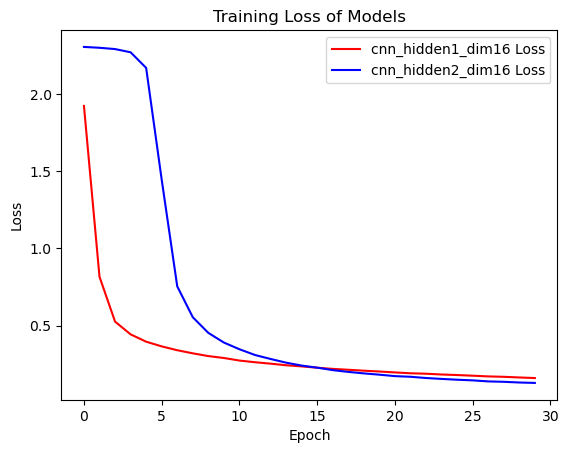

In [15]:
# Plotting
epochs = list(range(num_epoch))
plt.plot(epochs, avgLosses1, 'r', label='cnn_hidden1_dim16 Loss')
plt.plot(epochs, avgLosses2, 'b', label='cnn_hidden2_dim16 Loss')
plt.title('Training Loss of Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

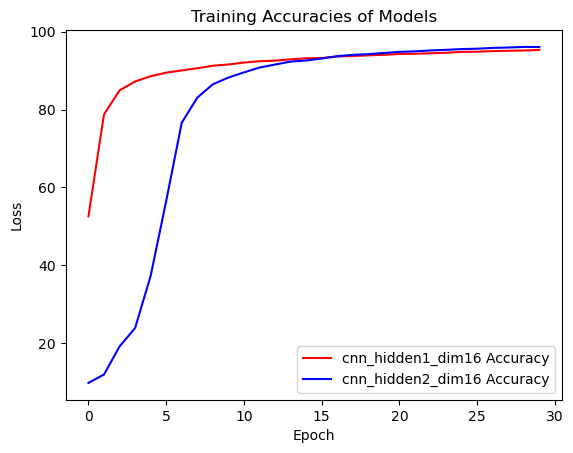

In [16]:
# Plotting
plt.plot(epochs, avgAccs1, 'r', label='cnn_hidden1_dim16 Accuracy')
plt.plot(epochs, avgAccs2, 'b', label='cnn_hidden2_dim16 Accuracy')
plt.title('Training Accuracies of Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
# Test
net1.eval()
net2.eval()

n_correct1 = 0
n_samples1 = 0
n_correct2 = 0
n_samples2 = 0
n_class_correct1 = [0 for i in range(10)]
n_class_samples1 = [0 for i in range(10)]
n_class_correct2 = [0 for i in range(10)]
n_class_samples2 = [0 for i in range(10)]

with torch.no_grad():
    for x, (imgs, labels) in enumerate(test_loader):
        cnn1Output = net1(imgs)
        cnn2Output = net2(imgs)

        _, prediction1 = torch.max(cnn1Output.data, 1)
        n_samples1 += labels.size(0)
        n_correct1 += (prediction1 == labels).sum().item()

        _, prediction2 = torch.max(cnn2Output.data, 1)
        n_samples2 += labels.size(0)
        n_correct2 += (prediction2 == labels).sum().item()


        for i in range(labels.size(0)):
            label = labels[i]
            if label == prediction1[i]:
                n_class_correct1[label] += 1
            n_class_samples1[label] += 1


        for i in range(labels.size(0)):
            label = labels[i]
            if label == prediction2[i]:
                n_class_correct2[label] += 1
            n_class_samples2[label] += 1


    netAcc1 = 100.0 * n_correct1 / n_samples1
    print(f'Overall Accuracy of cnn1: {netAcc1} %')


    for i in range(10):
        if n_class_samples1[i] > 0:
            acc = 100.0 * n_class_correct1[i] / n_class_samples1[i]
            print(f'Accuracy of class {i} in cnn1: {acc} %')

    print("-------------------------------------------")

    netAcc2 = 100.0 * n_correct2 / n_samples2
    print(f'Overall Accuracy of cnn2: {netAcc2} %')

    for i in range(10):
        if n_class_samples2[i] > 0:
            acc = 100.0 * n_class_correct2[i] / n_class_samples2[i]
            print(f'Accuracy of class {i} in cnn2: {acc} %')

Overall Accuracy of cnn1: 96.4 %
Accuracy of class 0 in cnn1: 98.6734693877551 %
Accuracy of class 1 in cnn1: 98.32599118942731 %
Accuracy of class 2 in cnn1: 96.22093023255815 %
Accuracy of class 3 in cnn1: 96.43564356435644 %
Accuracy of class 4 in cnn1: 96.43584521384929 %
Accuracy of class 5 in cnn1: 95.4035874439462 %
Accuracy of class 6 in cnn1: 96.97286012526096 %
Accuracy of class 7 in cnn1: 95.91439688715953 %
Accuracy of class 8 in cnn1: 94.96919917864476 %
Accuracy of class 9 in cnn1: 94.35084241823587 %
-------------------------------------------
Overall Accuracy of cnn2: 97.18 %
Accuracy of class 0 in cnn2: 99.28571428571429 %
Accuracy of class 1 in cnn2: 98.23788546255507 %
Accuracy of class 2 in cnn2: 96.12403100775194 %
Accuracy of class 3 in cnn2: 96.73267326732673 %
Accuracy of class 4 in cnn2: 97.14867617107943 %
Accuracy of class 5 in cnn2: 97.53363228699551 %
Accuracy of class 6 in cnn2: 97.91231732776617 %
Accuracy of class 7 in cnn2: 96.3035019455253 %
Accuracy o

# HW 1-2

Visualize Optimization

In [18]:
#Imports
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.nn.utils import parameters_to_vector, vector_to_parameters
from torch.autograd import Variable
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import sklearn
from sklearn.decomposition import PCA

In [19]:
# Transform
transform = transforms.Compose([transforms.ToTensor()])

# Train Data
train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Train Data Loader
train_loader = torch.utils.data.DataLoader(train, batch_size=300, shuffle=False)

# Test Data
test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Test Data Loader
test_loader = torch.utils.data.DataLoader(test, batch_size=100, shuffle=False)

In [20]:
#Deep Model (227,935 parameters)
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(784, 250)
    self.fc2 = nn.Linear(250, 100)
    self.fc3 = nn.Linear(100,50)
    self.fc4 = nn.Linear(50,25)
    self.fc5 = nn.Linear(25,10)

  def forward(self,x):
    x = x.view(x.size(0), -1)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = self.fc5(x)
    return x

dnn=Model()

In [21]:
lossFunction = nn.CrossEntropyLoss()
optimizer = optim.SGD(dnn.parameters(), lr=0.001, momentum=0.9)

In [22]:
#Train
all_avgLosses = []
all_avgAccs = []
all_paramDf = pd.DataFrame()
all_layer1Params = []

for trainingRun in range(8):

  num_epoch=30
  avgLosses=[]
  avgAccs=[]
  paramDf=pd.DataFrame()
  layer1Params = []

  for epoch in range(num_epoch):
    dnn.train()
    dnnLoss = []
    dnnAcc = []
    n_correct = 0
    n_samples = 0
    df = pd.DataFrame()

    for x, (imgs,labels) in enumerate(train_loader):
      #DNN Train
      optimizer.zero_grad()
      dnnOutput = dnn(imgs)
      loss = lossFunction(dnnOutput, labels)
      loss.backward()
      optimizer.step()
      dnnLoss.append(loss.item())

      _, prediction = torch.max(dnnOutput.data, 1)
      n_samples += labels.size(0)
      n_correct += (prediction == labels).sum().item()
      acc = 100.0 * n_correct / n_samples
      dnnAcc.append(acc)

    if ((epoch +1 ) % 3) == 0:

      avgLoss = sum(dnnLoss) / len(dnnLoss)
      avgAcc = 100.0 * n_correct / n_samples
      avgLosses.append(avgLoss)
      avgAccs.append(avgAcc)

      fc1_params = dnn.fc1.weight.detach().cpu().numpy()

      for name, params in dnn.named_parameters():
        if'weight' in name:
          wts = torch.nn.utils.parameters_to_vector(params).detach().numpy()
          df = pd.concat([df, pd.DataFrame(wts).T], axis = 1)

      paramDf = pd.concat([paramDf, df], axis = 0)
      layer1Params.append(fc1_params)

      print(f'Epoch {epoch+1}/{num_epoch},  Model Loss: {avgLoss}, Model Acc: {avgAcc}')

  all_avgLosses.extend(avgLosses)
  all_avgAccs.extend(avgAccs)
  all_layer1Params.append(layer1Params)
  all_paramDf = pd.concat([all_paramDf, paramDf], axis=0)

  print(f'Finished Training Run: {trainingRun+1}')
print('All runs complete.')


all_avgLosses = np.array(all_avgLosses).reshape(8, 10)
all_avgAccs = np.array(all_avgAccs).reshape(8, 10)

params_per_run = len(all_paramDf) // 8
all_param_runs = [all_paramDf.iloc[i * params_per_run:(i + 1) * params_per_run] for i in range(8)]


Epoch 3/30,  Model Loss: 2.299336364269257, Model Acc: 9.751666666666667
Epoch 6/30,  Model Loss: 2.281984279155731, Model Acc: 15.943333333333333
Epoch 9/30,  Model Loss: 2.165673347711563, Model Acc: 31.311666666666667
Epoch 12/30,  Model Loss: 1.6215180051326752, Model Acc: 44.43666666666667
Epoch 15/30,  Model Loss: 0.8850680169463158, Model Acc: 72.09
Epoch 18/30,  Model Loss: 0.5786774612963199, Model Acc: 83.49666666666667
Epoch 21/30,  Model Loss: 0.4519959023594856, Model Acc: 87.10833333333333
Epoch 24/30,  Model Loss: 0.39483456082642077, Model Acc: 88.77166666666666
Epoch 27/30,  Model Loss: 0.34670682936906816, Model Acc: 90.2
Epoch 30/30,  Model Loss: 0.3027636994421482, Model Acc: 91.46166666666667
Finished Training Run: 1
Epoch 3/30,  Model Loss: 0.2642244461923838, Model Acc: 92.55
Epoch 6/30,  Model Loss: 0.23242488820105792, Model Acc: 93.445
Epoch 9/30,  Model Loss: 0.20714321814477443, Model Acc: 94.13166666666666
Epoch 12/30,  Model Loss: 0.18701699066907168, Mode

In [23]:
#Test
dnn.eval()

n_correct = 0
n_samples = 0
n_class_correct = [0 for i in range(10)]
n_class_samples = [0 for i in range(10)]

with torch.no_grad():
    for x, (imgs, labels) in enumerate(test_loader):
        dnnOutput = dnn(imgs)

        _, prediction = torch.max(dnnOutput.data, 1)
        n_samples += labels.size(0)
        n_correct += (prediction == labels).sum().item()

        for i in range(labels.size(0)):
            label = labels[i]
            if label == prediction[i]:
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    netAcc = 100.0 * n_correct / n_samples
    print(f'Overall Accuracy of dnn: {netAcc} %')

    for i in range(10):
        if n_class_samples[i] > 0:
            acc = 100.0 * n_class_correct[i] / n_class_samples[i]
            print(f'Accuracy of class {i}: {acc} %')



Overall Accuracy of dnn: 97.12 %
Accuracy of class 0: 98.36734693877551 %
Accuracy of class 1: 98.8546255506608 %
Accuracy of class 2: 96.22093023255815 %
Accuracy of class 3: 96.83168316831683 %
Accuracy of class 4: 97.75967413441956 %
Accuracy of class 5: 96.74887892376681 %
Accuracy of class 6: 97.39039665970772 %
Accuracy of class 7: 96.40077821011673 %
Accuracy of class 8: 95.68788501026694 %
Accuracy of class 9: 96.72943508424183 %


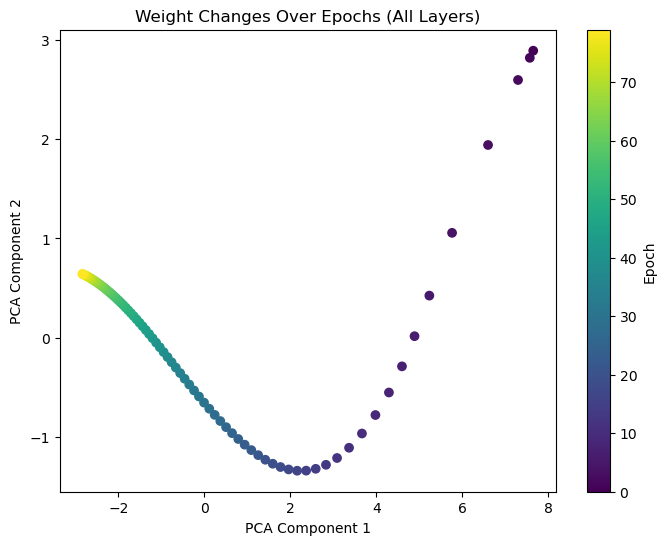

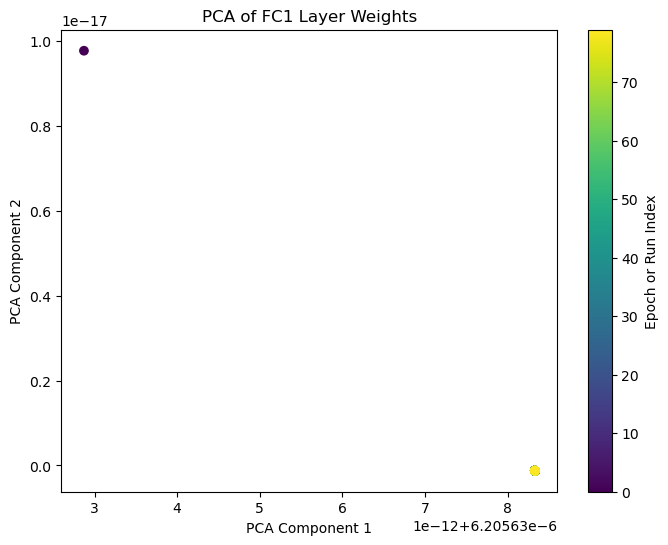

In [24]:
#PCA and Plot
pca = PCA(n_components=2)
reduced_weights = pca.fit_transform(all_paramDf)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_weights[:, 0], reduced_weights[:, 1], c=range(len(reduced_weights)), cmap='viridis')
plt.colorbar(label='Epoch')
plt.title('Weight Changes Over Epochs (All Layers)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Layer 1
all_fc1_params = [item.flatten() for sublist in all_layer1Params for item in sublist]
fc1_params_array = np.array(all_fc1_params)

pca_fc1 = PCA(n_components=2)
reduced_layer_weights = pca_fc1.fit_transform(fc1_params_array)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_layer_weights[:, 0], reduced_layer_weights[:, 1], c=range(len(reduced_layer_weights)), cmap='viridis')
plt.colorbar(label='Epoch or Run Index')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of FC1 Layer Weights')
plt.show()


In [25]:
print(fc1_params.shape)
print(reduced_layer_weights.shape)

(250, 784)
(80, 2)


In [26]:
print(f'Explained variance ratio: {pca_fc1.explained_variance_ratio_}')

Explained variance ratio: [9.9999958e-01 3.1410765e-26]


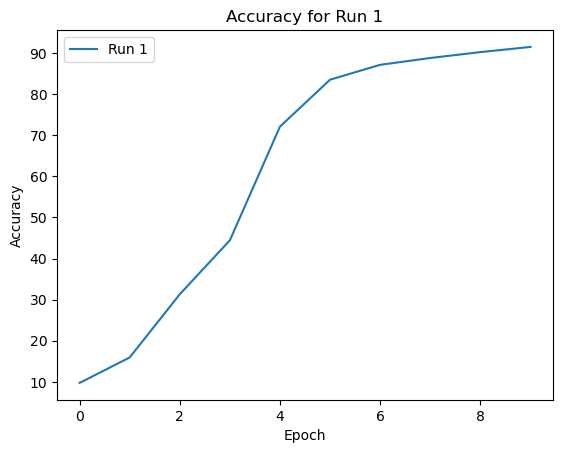

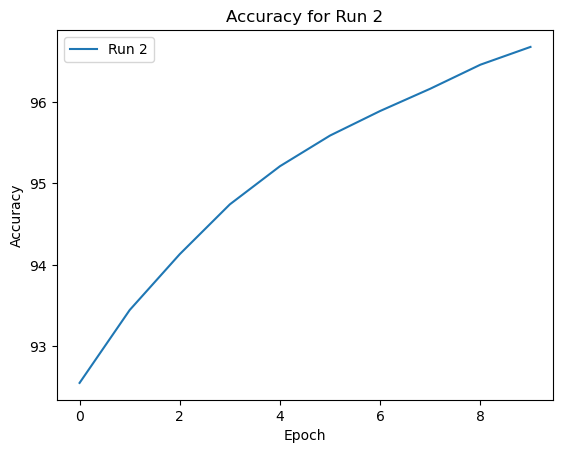

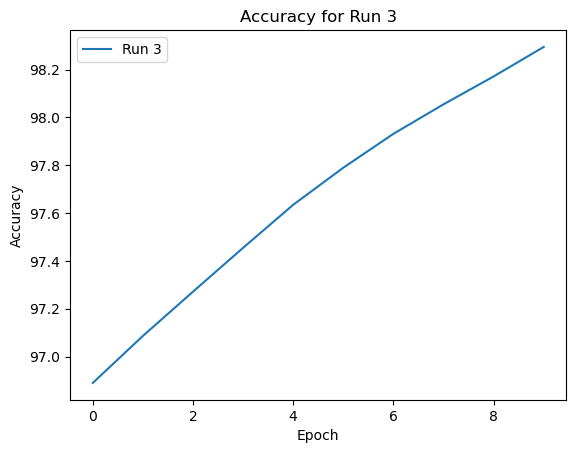

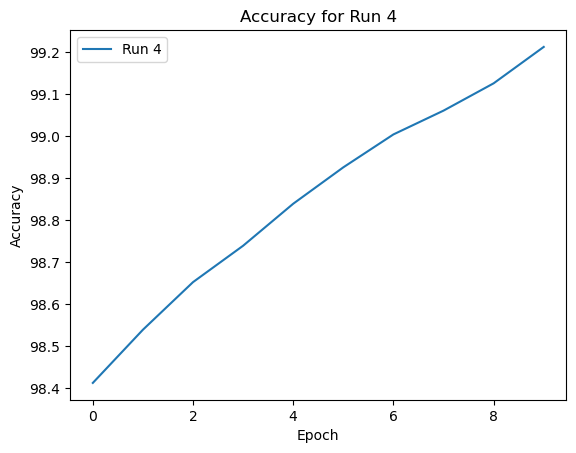

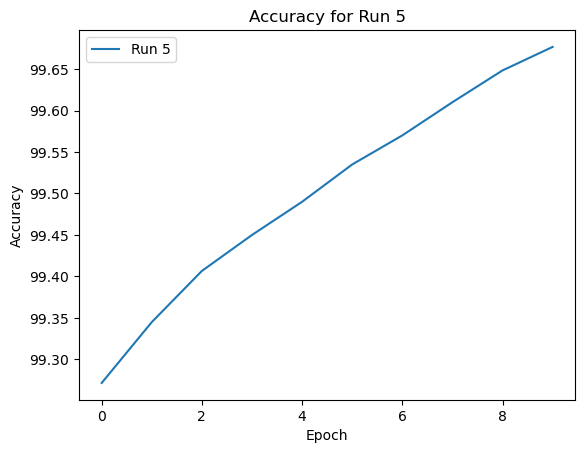

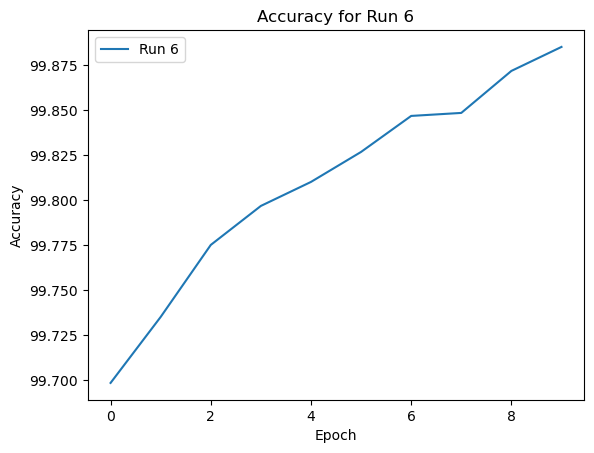

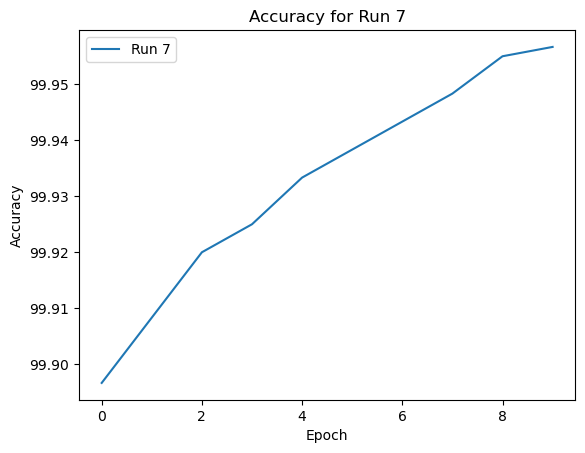

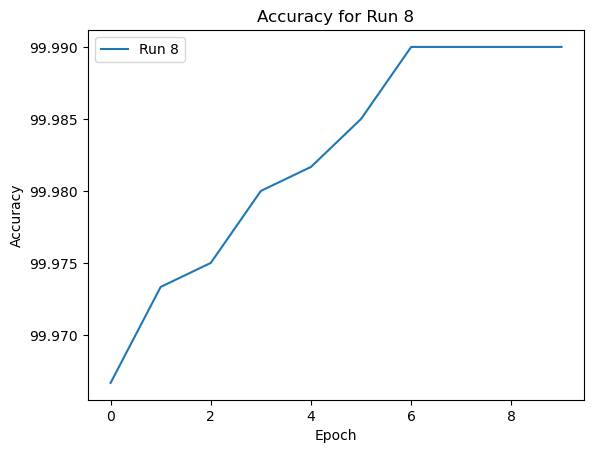

In [27]:
#Accuracy vs Epochs
for i in range(8):
    plt.figure()
    plt.plot(all_avgAccs[i], label=f'Run {i+1}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy for Run {i+1}')
    plt.legend()
    plt.show()

Observe Gradient Norm During Training

In [28]:
#GT Function
def GT_function (x):
  return (np.sin(5*np.pi*x))/(5*np.pi*x)

#Dataset
x_train = np.linspace(-1, 1, 500)
y_train=GT_function(x_train)

#Convert to Tensors
x_train_tensor= torch.FloatTensor(x_train).unsqueeze(1)
y_train_tensor= torch.FloatTensor(y_train).unsqueeze(1)

In [29]:
class Model0(nn.Module):
  def __init__(self):
    super(Model0, self).__init__()
    self.fc1 = nn.Linear(1, 50)
    self.fc2 = nn.Linear(50,19)
    self.fc3 = nn.Linear(19,1)


  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x =self.fc3(x)
    return x
model = Model0()

In [30]:
lossFunction = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [31]:
#Train
epochs = 5000
Loss = []
gradients=[]

for x in range(epochs):
  model.train()
  optimizer.zero_grad()
  output = model(x_train_tensor)
  sLoss = lossFunction(output, y_train_tensor)
  sLoss.backward()
  optimizer.step()
  Loss.append(sLoss.item())

  grad_all=0.0
  for p in model.parameters():
    grad=0.0
    if p.grad is not None:
      grad = (p.grad.cpu().data.numpy()**2).sum()
      grad_all += grad
    grad_norm = grad_all**0.5

  gradients.append(grad_norm)

  if x % 100 == 0:
        print(f'Epoch {x}/{epochs}, Model Loss: {sLoss.item()}, Grad Norm: {grad_norm}')

Epoch 0/5000, Model Loss: 0.10399150848388672, Grad Norm: 0.36346756929595
Epoch 100/5000, Model Loss: 0.05126373469829559, Grad Norm: 0.03607727190180931
Epoch 200/5000, Model Loss: 0.021454736590385437, Grad Norm: 0.03108938583862292
Epoch 300/5000, Model Loss: 0.008032717742025852, Grad Norm: 0.01257394743575824
Epoch 400/5000, Model Loss: 0.005852166563272476, Grad Norm: 0.004426989969918989
Epoch 500/5000, Model Loss: 0.004896356258541346, Grad Norm: 0.031097085422731586
Epoch 600/5000, Model Loss: 0.003968670964241028, Grad Norm: 0.015085913781715882
Epoch 700/5000, Model Loss: 0.0032241432927548885, Grad Norm: 0.06806132210888441
Epoch 800/5000, Model Loss: 0.00252889608964324, Grad Norm: 0.01579381496633081
Epoch 900/5000, Model Loss: 0.0019975395407527685, Grad Norm: 0.002776080784904748
Epoch 1000/5000, Model Loss: 0.0015946649946272373, Grad Norm: 0.004756668684558507
Epoch 1100/5000, Model Loss: 0.001300922711379826, Grad Norm: 0.06879199275923008
Epoch 1200/5000, Model Los

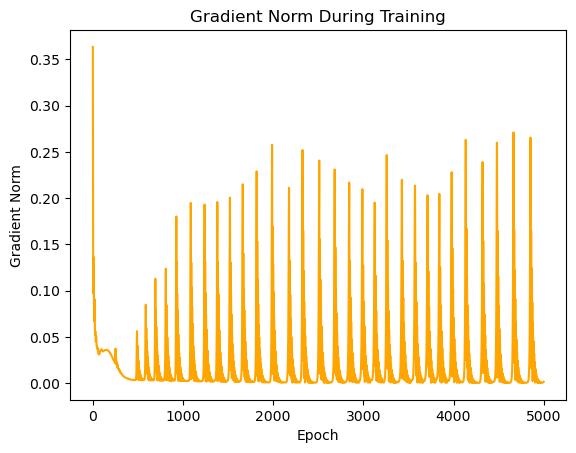

In [32]:
#Plot
n_batches = len(gradients)
n_epochs = np.arange(1, n_batches + 1)

plt.title('Gradient Norm During Training')
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.plot(n_epochs, gradients, color='orange')
plt.show()

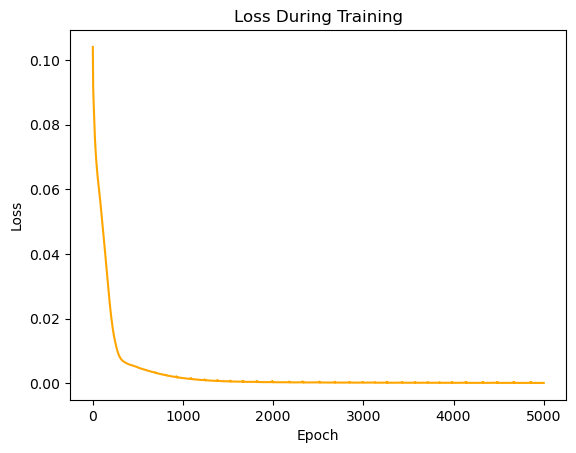

In [33]:
n_epochs = np.arange(1, epochs + 1)

plt.title('Loss During Training')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(n_epochs, Loss, color='orange')
plt.show()

What Happened when the Gradient Is Almost Zero?

In [34]:
#GT Function
def GT_function (x):
  return (np.sin(5*np.pi*x))/(5*np.pi*x)

#Dataset
x_train = np.linspace(-1, 1, 500)
y_train=GT_function(x_train)

#Convert to Tensors
x_train_tensor= torch.FloatTensor(x_train).unsqueeze(1)
y_train_tensor= torch.FloatTensor(y_train).unsqueeze(1)


class Model0(nn.Module):
  def __init__(self):
    super(Model0, self).__init__()
    self.fc1 = nn.Linear(1, 50)
    self.fc2 = nn.Linear(50,19)
    self.fc3 = nn.Linear(19,1)


  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x =self.fc3(x)
    return x
model = Model0()


lossFunction = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)


In [35]:
#Train
trainingRuns=100
min_ratios = []
losses =[]

for run in range(trainingRuns):
  epochs = 5000
  Loss = []
  gradients=[]
  weight_min_ratios = []

  for x in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(x_train_tensor)
    sLoss = lossFunction(output, y_train_tensor)
    sLoss.backward()
    optimizer.step()
    Loss.append(sLoss.item())

    grad_all=0.0
    for p in model.parameters():
      grad=0.0
      if p.grad is not None:
        grad = (p.grad.cpu().data.numpy()**2).sum()
        grad_all += grad
      grad_norm = grad_all**0.5
    gradients.append(grad_norm)


    if grad_norm < 1e-5:

      hessian = torch.autograd.functional.hessian(lambda w: lossFunction(model(x_train_tensor), y_train_tensor), x_train_tensor)
      hessian_2d = hessian.view(hessian.shape[0], -1)

      eigenvalues, _ = torch.linalg.eigh(hessian_2d)
      minimal_ratio = (eigenvalues > 0).sum() / len(eigenvalues)
      losses.append(sLoss.item())
      min_ratios.append(minimal_ratio)

    if x % 500 == 0:
      print(f'Epoch {x}/{epochs}, Model Loss: {sLoss.item()}, Grad Norm: {grad_norm}')
  print(f'Run: {run+1} complete.')

Epoch 0/5000, Model Loss: 0.17120049893856049, Grad Norm: 1.0686984596181206
Epoch 500/5000, Model Loss: 0.005271305330097675, Grad Norm: 0.0057052401416151964
Epoch 1000/5000, Model Loss: 0.002252737060189247, Grad Norm: 0.003180720588288404
Epoch 1500/5000, Model Loss: 0.0007572554750367999, Grad Norm: 0.013564044242426344
Epoch 2000/5000, Model Loss: 0.0003501656756270677, Grad Norm: 0.01779187295548414
Epoch 2500/5000, Model Loss: 0.00029647012706846, Grad Norm: 0.008004622610696809
Epoch 3000/5000, Model Loss: 0.0002798262576106936, Grad Norm: 0.007974220307028525
Epoch 3500/5000, Model Loss: 0.0002690840919967741, Grad Norm: 0.001269638215167443
Epoch 4000/5000, Model Loss: 0.00026171523495577276, Grad Norm: 0.00642213231498273
Epoch 4500/5000, Model Loss: 0.0002563659509178251, Grad Norm: 0.0102724230607856
Run: 1 complete.
Epoch 0/5000, Model Loss: 0.00025139714125543833, Grad Norm: 0.007567981654185043
Epoch 500/5000, Model Loss: 0.00024646258680149913, Grad Norm: 0.0045270596

Epoch 3000/5000, Model Loss: 0.00021419950644485652, Grad Norm: 0.004581541386631285
Epoch 3500/5000, Model Loss: 0.00021397951059043407, Grad Norm: 8.577910422168018e-05
Epoch 4000/5000, Model Loss: 0.00021791730250697583, Grad Norm: 0.022895382782104953
Epoch 4500/5000, Model Loss: 0.0002153619279852137, Grad Norm: 0.013974366492500608
Run: 10 complete.
Epoch 0/5000, Model Loss: 0.00021659024059772491, Grad Norm: 0.018875774216738247
Epoch 500/5000, Model Loss: 0.00021717492199968547, Grad Norm: 0.021010264650381687
Epoch 1000/5000, Model Loss: 0.00021386063599493355, Grad Norm: 0.003876508432888573
Epoch 1500/5000, Model Loss: 0.00021965491760056466, Grad Norm: 0.027860327144522797
Epoch 2000/5000, Model Loss: 0.00021488255879376084, Grad Norm: 0.011916952519015275
Epoch 2500/5000, Model Loss: 0.00021737389033660293, Grad Norm: 0.02206133847951077
Epoch 3000/5000, Model Loss: 0.00021364820713642985, Grad Norm: 0.0026431692192282444
Epoch 3500/5000, Model Loss: 0.00021780854149255902

Epoch 500/5000, Model Loss: 0.00021294922044035047, Grad Norm: 0.009197893157725127
Epoch 1000/5000, Model Loss: 0.000212313694646582, Grad Norm: 0.0020544615251814344
Epoch 1500/5000, Model Loss: 0.00021228333935141563, Grad Norm: 0.0008717611966440296
Epoch 2000/5000, Model Loss: 0.00021227754768915474, Grad Norm: 0.0006875426216547954
Epoch 2500/5000, Model Loss: 0.0002122808073181659, Grad Norm: 0.0010793302590430842
Epoch 3000/5000, Model Loss: 0.00021228048717603087, Grad Norm: 0.0012707800777065554
Epoch 3500/5000, Model Loss: 0.0002252341655548662, Grad Norm: 0.04032088015994356
Epoch 4000/5000, Model Loss: 0.00029406690737232566, Grad Norm: 0.1013608695380712
Epoch 4500/5000, Model Loss: 0.00021660576749127358, Grad Norm: 0.02341536586419871
Run: 20 complete.
Epoch 0/5000, Model Loss: 0.0003009990032296628, Grad Norm: 0.10590982044580241
Epoch 500/5000, Model Loss: 0.00021225129603408277, Grad Norm: 0.00047198224612167867
Epoch 1000/5000, Model Loss: 0.0002122482837876305, Gra

Epoch 3000/5000, Model Loss: 0.00022578367497771978, Grad Norm: 0.04075786636545994
Epoch 3500/5000, Model Loss: 0.00021413940703496337, Grad Norm: 0.016250948275603146
Epoch 4000/5000, Model Loss: 0.00021190830739215016, Grad Norm: 0.0005921972058116734
Epoch 4500/5000, Model Loss: 0.00021214598382357508, Grad Norm: 0.005240720649422924
Run: 29 complete.
Epoch 0/5000, Model Loss: 0.00021453193039633334, Grad Norm: 0.017697716896035467
Epoch 500/5000, Model Loss: 0.00012078199506504461, Grad Norm: 0.008031980649378986
Epoch 1000/5000, Model Loss: 3.535682481015101e-05, Grad Norm: 0.01598202713757501
Epoch 1500/5000, Model Loss: 3.297222428955138e-05, Grad Norm: 0.0009944856808266392
Epoch 2000/5000, Model Loss: 3.303932317066938e-05, Grad Norm: 0.004068195885788111
Epoch 2500/5000, Model Loss: 3.269418084528297e-05, Grad Norm: 0.0015673276507692823
Epoch 3000/5000, Model Loss: 3.8899146602489054e-05, Grad Norm: 0.027580410216946065
Epoch 3500/5000, Model Loss: 3.251033558626659e-05, Gr

Epoch 1000/5000, Model Loss: 3.154784644721076e-05, Grad Norm: 0.00020252001689659218
Epoch 1500/5000, Model Loss: 3.22722080454696e-05, Grad Norm: 0.009144440465604463
Epoch 2000/5000, Model Loss: 3.154608202748932e-05, Grad Norm: 0.001009705791150524
Epoch 2500/5000, Model Loss: 3.154184014420025e-05, Grad Norm: 0.0007193359248938072
Epoch 3000/5000, Model Loss: 3.255385672673583e-05, Grad Norm: 0.010874773905475471
Epoch 3500/5000, Model Loss: 3.2791071134852245e-05, Grad Norm: 0.011972202013577045
Epoch 4000/5000, Model Loss: 3.1580435461364686e-05, Grad Norm: 0.002666196722216637
Epoch 4500/5000, Model Loss: 3.5696426493814215e-05, Grad Norm: 0.021813203575420007
Run: 39 complete.
Epoch 0/5000, Model Loss: 3.16865298373159e-05, Grad Norm: 0.0043315439889104025
Epoch 500/5000, Model Loss: 3.1654013582738116e-05, Grad Norm: 0.004042746870412995
Epoch 1000/5000, Model Loss: 8.736430754652247e-05, Grad Norm: 0.08014804879043128
Epoch 1500/5000, Model Loss: 3.1509498512605205e-05, Grad

Epoch 4000/5000, Model Loss: 3.134779763058759e-05, Grad Norm: 0.0007685280933980164
Epoch 4500/5000, Model Loss: 7.240508421091363e-05, Grad Norm: 0.0668505492292831
Run: 48 complete.
Epoch 0/5000, Model Loss: 3.204717722837813e-05, Grad Norm: 0.008768924673024139
Epoch 500/5000, Model Loss: 3.655275941127911e-05, Grad Norm: 0.023772740543396575
Epoch 1000/5000, Model Loss: 3.6779918445972726e-05, Grad Norm: 0.024280372343303783
Epoch 1500/5000, Model Loss: 3.13377968268469e-05, Grad Norm: 4.69583097270812e-05
Epoch 2000/5000, Model Loss: 3.160965206916444e-05, Grad Norm: 0.005414504712994822
Epoch 2500/5000, Model Loss: 3.2110070605995134e-05, Grad Norm: 0.009162745630256165
Epoch 3000/5000, Model Loss: 3.223754538339563e-05, Grad Norm: 0.009878272748571943
Epoch 3500/5000, Model Loss: 3.199815546395257e-05, Grad Norm: 0.00843523686183269
Epoch 4000/5000, Model Loss: 3.142005516565405e-05, Grad Norm: 0.003083654887032687
Epoch 4500/5000, Model Loss: 3.689990262500942e-05, Grad Norm: 

Epoch 2000/5000, Model Loss: 4.3921463657170534e-05, Grad Norm: 0.03604432783585899
Epoch 2500/5000, Model Loss: 3.45983644365333e-05, Grad Norm: 0.018578616789680664
Epoch 3000/5000, Model Loss: 3.129966717096977e-05, Grad Norm: 0.0027821250588074675
Epoch 3500/5000, Model Loss: 3.15546385536436e-05, Grad Norm: 0.005821540806617979
Epoch 4000/5000, Model Loss: 3.13080454361625e-05, Grad Norm: 0.002961894092232249
Epoch 4500/5000, Model Loss: 3.122726411675103e-05, Grad Norm: 0.0008042860496208891
Run: 58 complete.
Epoch 0/5000, Model Loss: 3.575375012587756e-05, Grad Norm: 0.02147243119331116
Epoch 500/5000, Model Loss: 4.97955952596385e-05, Grad Norm: 0.043531357466346565
Epoch 1000/5000, Model Loss: 3.445120819378644e-05, Grad Norm: 0.0181468739954196
Epoch 1500/5000, Model Loss: 3.122931957477704e-05, Grad Norm: 0.0010772960282551482
Epoch 2000/5000, Model Loss: 3.1471445254283026e-05, Grad Norm: 0.00508751129563419
Epoch 2500/5000, Model Loss: 3.33389725710731e-05, Grad Norm: 0.01

Run: 67 complete.
Epoch 0/5000, Model Loss: 3.5202108847443014e-05, Grad Norm: 0.019704072877413704
Epoch 500/5000, Model Loss: 9.116153523791581e-05, Grad Norm: 0.07617093421510951
Epoch 1000/5000, Model Loss: 3.1492774724029005e-05, Grad Norm: 0.005666422678963059
Epoch 1500/5000, Model Loss: 9.397642861586064e-05, Grad Norm: 0.07790725275353726
Epoch 2000/5000, Model Loss: 3.1214298360282555e-05, Grad Norm: 0.0022974117891146105
Epoch 2500/5000, Model Loss: 3.116009247605689e-05, Grad Norm: 0.0002613087812612166
Epoch 3000/5000, Model Loss: 3.1159372156253085e-05, Grad Norm: 3.922075395914154e-05
Epoch 3500/5000, Model Loss: 3.1161336664808914e-05, Grad Norm: 0.0004702387682397935
Epoch 4000/5000, Model Loss: 3.1158633646555245e-05, Grad Norm: 0.00010126891308407629
Epoch 4500/5000, Model Loss: 3.1292616768041626e-05, Grad Norm: 0.003576502530721998
Run: 68 complete.
Epoch 0/5000, Model Loss: 3.138359170407057e-05, Grad Norm: 0.004631755306243063
Epoch 500/5000, Model Loss: 4.363092

Epoch 2500/5000, Model Loss: 3.1127547117648646e-05, Grad Norm: 4.4327122658921476e-05
Epoch 3000/5000, Model Loss: 3.112542617600411e-05, Grad Norm: 5.342136519905952e-05
Epoch 3500/5000, Model Loss: 3.1125960958888754e-05, Grad Norm: 4.518420089147939e-06
Epoch 4000/5000, Model Loss: 3.112568083452061e-05, Grad Norm: 1.5951720924805286e-05
Epoch 4500/5000, Model Loss: 3.1125535315368325e-05, Grad Norm: 1.9114751847963347e-05
Run: 77 complete.
Epoch 0/5000, Model Loss: 3.112603008048609e-05, Grad Norm: 9.508338863177525e-06
Epoch 500/5000, Model Loss: 3.112691774731502e-05, Grad Norm: 0.0001345683516031104
Epoch 1000/5000, Model Loss: 3.4875021810876206e-05, Grad Norm: 0.01853014427500184
Epoch 1500/5000, Model Loss: 3.5332224797457457e-05, Grad Norm: 0.01958978415469851
Epoch 2000/5000, Model Loss: 6.517119618365541e-05, Grad Norm: 0.05580259835031312
Epoch 2500/5000, Model Loss: 0.0001202349885716103, Grad Norm: 0.08964486807815754
Epoch 3000/5000, Model Loss: 3.116319203400053e-05,

Epoch 500/5000, Model Loss: 3.109005410806276e-05, Grad Norm: 0.000592894959224229
Epoch 1000/5000, Model Loss: 3.1088093237485737e-05, Grad Norm: 0.0002777938059946455
Epoch 1500/5000, Model Loss: 0.00011665689089568332, Grad Norm: 0.08650135703469211
Epoch 2000/5000, Model Loss: 3.1100866181077436e-05, Grad Norm: 0.0011327865907186394
Epoch 2500/5000, Model Loss: 4.700613135355525e-05, Grad Norm: 0.037127498425249365
Epoch 3000/5000, Model Loss: 3.108512464677915e-05, Grad Norm: 1.8702487285513563e-05
Epoch 3500/5000, Model Loss: 4.046918184030801e-05, Grad Norm: 0.02847874558166487
Epoch 4000/5000, Model Loss: 3.1092036806512624e-05, Grad Norm: 0.0007863071452828324
Epoch 4500/5000, Model Loss: 3.992485289927572e-05, Grad Norm: 0.02772188442136448
Run: 87 complete.
Epoch 0/5000, Model Loss: 3.171242860844359e-05, Grad Norm: 0.0073669323384333695
Epoch 500/5000, Model Loss: 6.153345748316497e-05, Grad Norm: 0.051477430307514845
Epoch 1000/5000, Model Loss: 3.10831492242869e-05, Grad 

Epoch 3500/5000, Model Loss: 3.1093873985810205e-05, Grad Norm: 0.0016390904682432104
Epoch 4000/5000, Model Loss: 3.106194708379917e-05, Grad Norm: 7.926018301927486e-05
Epoch 4500/5000, Model Loss: 3.106347139691934e-05, Grad Norm: 0.00037956421307532435
Run: 96 complete.
Epoch 0/5000, Model Loss: 3.10651448671706e-05, Grad Norm: 0.0004969538267941923
Epoch 500/5000, Model Loss: 3.1211257009999827e-05, Grad Norm: 0.003515582335465924
Epoch 1000/5000, Model Loss: 3.0934970709495246e-05, Grad Norm: 0.0038622774077880515
Epoch 1500/5000, Model Loss: 4.9020760343410075e-05, Grad Norm: 0.038942850980848535
Epoch 2000/5000, Model Loss: 3.106862277491018e-05, Grad Norm: 0.005384306332831077
Epoch 2500/5000, Model Loss: 3.07285699818749e-05, Grad Norm: 0.0016913086399603123
Epoch 3000/5000, Model Loss: 3.0678176699439064e-05, Grad Norm: 0.0002488455274204745
Epoch 3500/5000, Model Loss: 3.066160570597276e-05, Grad Norm: 6.786811763487108e-05
Epoch 4000/5000, Model Loss: 3.0649527616333216e-0

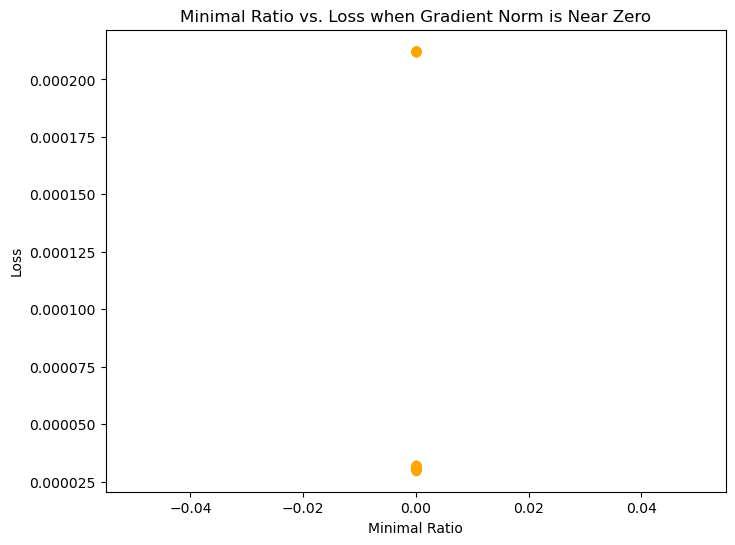

In [36]:
#Plot
plt.figure(figsize=(8, 6))
plt.scatter(min_ratios, losses, color='orange')
plt.xlabel('Minimal Ratio')
plt.ylabel('Loss')
plt.title('Minimal Ratio vs. Loss when Gradient Norm is Near Zero')
plt.show()

# HW 1-3

Can the Network Fit Random Labels?

In [37]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random
import numpy as np
from torchvision import datasets
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import copy

/var/folders/f7/vjh37rps38b0_cds6j5_hfrw0000gn/T/ipykernel_51128/1265509895.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(train.targets)


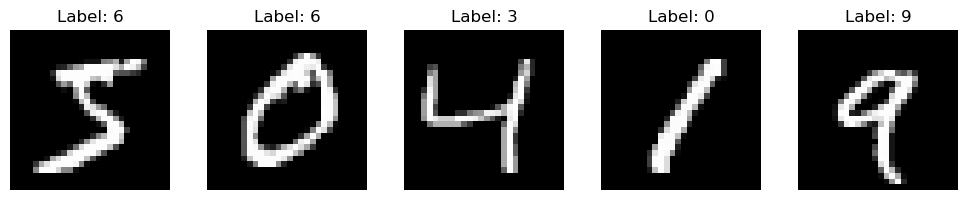

In [38]:
#Seed for Reproducibility
seed = 242
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train, batch_size=300, shuffle=False)
test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test, batch_size=100, shuffle=False)

labels = torch.tensor(train.targets)
shuffled_labels = labels[torch.randperm(len(labels))]
train.targets = shuffled_labels

fig, axes = plt.subplots(1, 5, figsize=(10, 2))

train_iter = iter(train_loader)
images, labels = next(train_iter)

for i in range(5):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {labels[i].item()}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [39]:
#Build Model
class Model0(nn.Module):
  def __init__(self):
    super(Model0, self).__init__()
    self.fc1 = nn.Linear(784, 250)
    self.fc2 = nn.Linear(250, 100)
    self.fc3 = nn.Linear(100,50)
    self.fc4 = nn.Linear(50,25)
    self.fc5 = nn.Linear(25,10)

  def forward(self,x):
    x = x.view(x.size(0), -1)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = self.fc5(x)
    return x

net=Model0()

lossFunction = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)

In [40]:
#Train
num_epoch=100
avgLosses=[]
avgAccs=[]
avgTestLosses=[]

for epoch in range(num_epoch):
  net.train()
  Loss = []
  Acc = []
  n_correct = 0
  n_samples = 0

  for x, (imgs,labels) in enumerate(train_loader):
    optimizer.zero_grad()
    output = net(imgs)
    loss = lossFunction(output, labels)
    loss.backward()
    optimizer.step()
    Loss.append(loss.item())

    _, prediction = torch.max(output.data, 1)
    n_samples += labels.size(0)
    n_correct += (prediction == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    Acc.append(acc)

  avgLoss = sum(Loss) / len(Loss)
  avgAcc = 100.0 * n_correct / n_samples
  avgLosses.append(avgLoss)
  avgAccs.append(avgAcc)

  net.eval()
  testLoss = 0.0
  n_correct = 0
  n_samples = 0

  with torch.no_grad():
      for x, (imgs, labels) in enumerate(test_loader):
        output = net(imgs)
        loss = lossFunction(output, labels)
        testLoss += loss.item()

        _, prediction = torch.max(output.data, 1)
        n_samples += labels.size(0)
        n_correct += (prediction == labels).sum().item()

  avgTestLoss = testLoss / len(test_loader)
  avgTestLosses.append(avgTestLoss)

  print(f'Epoch {epoch+1}/{num_epoch}, Loss: {avgLoss}, Acc: {avgAcc}')
  print(f'Test Loss: {avgTestLoss}')

print('Finished Training')

Epoch 1/100, Loss: 2.3054085874557497, Acc: 10.35
Test Loss: 2.3013920187950134
Epoch 2/100, Loss: 2.301347247362137, Acc: 11.24
Test Loss: 2.3010081672668456
Epoch 3/100, Loss: 2.301220020055771, Acc: 11.24
Test Loss: 2.3009641313552858
Epoch 4/100, Loss: 2.3011565709114077, Acc: 11.238333333333333
Test Loss: 2.3009680223464968
Epoch 5/100, Loss: 2.301104049682617, Acc: 11.238333333333333
Test Loss: 2.3010801005363466
Epoch 6/100, Loss: 2.3010472750663755, Acc: 11.236666666666666
Test Loss: 2.3012048387527466
Epoch 7/100, Loss: 2.30099702835083, Acc: 11.238333333333333
Test Loss: 2.301300449371338
Epoch 8/100, Loss: 2.3009467113018034, Acc: 11.236666666666666
Test Loss: 2.301418654918671
Epoch 9/100, Loss: 2.3008979773521423, Acc: 11.24
Test Loss: 2.301504285335541
Epoch 10/100, Loss: 2.3008468079566957, Acc: 11.24
Test Loss: 2.3016053867340087
Epoch 11/100, Loss: 2.300795941352844, Acc: 11.24
Test Loss: 2.301741855144501
Epoch 12/100, Loss: 2.3007470643520356, Acc: 11.243333333333334

Epoch 94/100, Loss: 2.2261632764339447, Acc: 17.576666666666668
Test Loss: 2.375585038661957
Epoch 95/100, Loss: 2.2228153777122497, Acc: 17.731666666666666
Test Loss: 2.38677570104599
Epoch 96/100, Loss: 2.2197810196876526, Acc: 17.925
Test Loss: 2.3989212489128113
Epoch 97/100, Loss: 2.216698226928711, Acc: 18.038333333333334
Test Loss: 2.4069623923301697
Epoch 98/100, Loss: 2.2118620789051056, Acc: 18.203333333333333
Test Loss: 2.4057038688659667
Epoch 99/100, Loss: 2.2080244171619414, Acc: 18.491666666666667
Test Loss: 2.408940281867981
Epoch 100/100, Loss: 2.2035359025001524, Acc: 18.863333333333333
Test Loss: 2.419026958942413
Finished Training


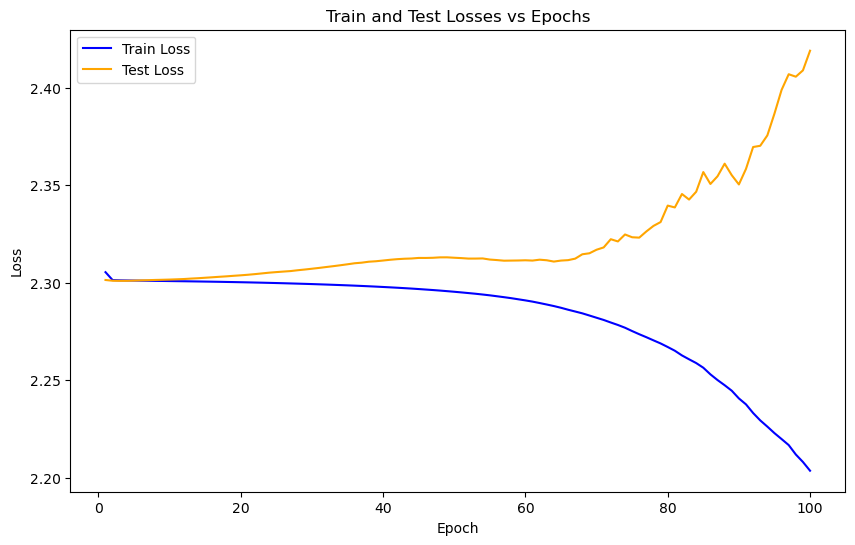

In [41]:
#Plot
epochs = range(1, num_epoch + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, avgLosses, label="Train Loss", color='blue')
plt.plot(epochs, avgTestLosses, label="Test Loss", color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Losses vs Epochs')
plt.legend()
plt.show()

Number of Parameters vs.Generalization

In [42]:
# Transform
transform = transforms.Compose([transforms.ToTensor()])

# Train Data
train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Train Data Loader
train_loader = torch.utils.data.DataLoader(train, batch_size=300, shuffle=False)

# Test Data
test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Test Data Loader
test_loader = torch.utils.data.DataLoader(test, batch_size=100, shuffle=False)

In [43]:
#Build
class Model0(nn.Module):
  def __init__(self):
    super(Model0, self).__init__()
    self.fc1 = nn.Linear(784, 250)
    self.fc2 = nn.Linear(250, 100)
    self.fc3 = nn.Linear(100,50)
    self.fc4 = nn.Linear(50,25)
    self.fc5 = nn.Linear(25,10)

  def forward(self,x):
    x = x.view(x.size(0), -1)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = self.fc5(x)
    return x

dnn0=Model0()

class Model1(nn.Module):
  def __init__(self):
    super(Model1, self).__init__()
    self.fc1 = nn.Linear(784, 600)
    self.fc2 = nn.Linear(600, 300)
    self.fc3 = nn.Linear(300,150)
    self.fc4 = nn.Linear(150,50)
    self.fc5 = nn.Linear(50,10)

  def forward(self,x):
    x = x.view(x.size(0), -1)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = self.fc5(x)
    return x

dnn1=Model1()

class Model2(nn.Module):
  def __init__(self):
    super(Model2, self).__init__()
    self.fc1 = nn.Linear(784, 500)
    self.fc2 = nn.Linear(500, 250)
    self.fc3 = nn.Linear(250,125)
    self.fc4 = nn.Linear(125,50)
    self.fc5 = nn.Linear(50,10)

  def forward(self,x):
    x = x.view(x.size(0), -1)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = self.fc5(x)
    return x
dnn2=Model2()

class Model3(nn.Module):
  def __init__(self):
    super(Model3, self).__init__()
    self.fc1 = nn.Linear(784, 750)
    self.fc2 = nn.Linear(750, 650)
    self.fc3 = nn.Linear(650,300)
    self.fc4 = nn.Linear(300,150)
    self.fc5 = nn.Linear(150,10)

  def forward(self,x):
    x = x.view(x.size(0), -1)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = self.fc5(x)
    return x
dnn3=Model3()

class Model4(nn.Module):
  def __init__(self):
    super(Model4, self).__init__()
    self.fc1 = nn.Linear(784, 200)
    self.fc2 = nn.Linear(200, 100)
    self.fc3 = nn.Linear(100,25)
    self.fc4 = nn.Linear(25,20)
    self.fc5 = nn.Linear(20,10)

  def forward(self,x):
    x = x.view(x.size(0), -1)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = self.fc5(x)
    return x
dnn4= Model4()

class Model5(nn.Module):
  def __init__(self):
    super(Model5, self).__init__()
    self.fc1 = nn.Linear(784, 50)
    self.fc2 = nn.Linear(50, 25)
    self.fc3 = nn.Linear(25,20)
    self.fc4 = nn.Linear(20,15)
    self.fc5 = nn.Linear(15,10)

  def forward(self,x):
    x = x.view(x.size(0), -1)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = self.fc5(x)
    return x
dnn5=Model5()

class Model6(nn.Module):
  def __init__(self):
    super(Model6, self).__init__()
    self.fc1 = nn.Linear(784, 200)
    self.fc2 = nn.Linear(200, 75)
    self.fc3 = nn.Linear(75,50)
    self.fc4 = nn.Linear(50,25)
    self.fc5 = nn.Linear(25,10)

  def forward(self,x):
    x = x.view(x.size(0), -1)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = self.fc5(x)
    return x
dnn6=Model6()

class Model7(nn.Module):
  def __init__(self):
    super(Model7, self).__init__()
    self.fc1 = nn.Linear(784, 100)
    self.fc2 = nn.Linear(100, 90)
    self.fc3 = nn.Linear(90,80)
    self.fc4 = nn.Linear(80,70)
    self.fc5 = nn.Linear(70,10)

  def forward(self,x):
    x = x.view(x.size(0), -1)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = self.fc5(x)
    return x
dnn7=Model7()

class Model8(nn.Module):
  def __init__(self):
    super(Model8, self).__init__()
    self.fc1 = nn.Linear(784, 700)
    self.fc2 = nn.Linear(700, 600)
    self.fc3 = nn.Linear(600,500)
    self.fc4 = nn.Linear(500,250)
    self.fc5 = nn.Linear(250,10)

  def forward(self,x):
    x = x.view(x.size(0), -1)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = self.fc5(x)
    return x
dnn8=Model8()

class Model9(nn.Module):
  def __init__(self):
    super(Model9, self).__init__()
    self.fc1 = nn.Linear(784, 500)
    self.fc2 = nn.Linear(500, 400)
    self.fc3 = nn.Linear(400,300)
    self.fc4 = nn.Linear(300,100)
    self.fc5 = nn.Linear(100,10)

  def forward(self,x):
    x = x.view(x.size(0), -1)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = self.fc5(x)
    return x
dnn9=Model9()


In [44]:
# Train
def Train(dnn):
    num_epoch = 25
    avgLosses = []
    avgAccs = []
    lossFunction = nn.CrossEntropyLoss()
    optimizer = optim.SGD(dnn.parameters(), lr=0.001, momentum=0.9)

    for epoch in range(num_epoch):
        dnn.train()
        dnnLoss = []
        n_correct = 0
        n_samples = 0

        for imgs, labels in train_loader:
            optimizer.zero_grad()
            dnnOutput = dnn(imgs)
            loss = lossFunction(dnnOutput, labels)
            loss.backward()
            optimizer.step()

            dnnLoss.append(loss.item())
            _, prediction = torch.max(dnnOutput.data, 1)
            n_samples += labels.size(0)
            n_correct += (prediction == labels).sum().item()

        avgLoss = sum(dnnLoss) / len(dnnLoss)
        avgAcc = 100.0 * n_correct / n_samples
        avgLosses.append(avgLoss)
        avgAccs.append(avgAcc)

        print(f'Epoch {epoch+1}/{num_epoch}, Loss: {avgLoss:.4f}, Acc: {avgAcc:.2f}')

    return avgLosses, avgAccs

# Test
def Test(dnn):
    dnn.eval()
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for _ in range(10)]
    n_class_samples = [0 for _ in range(10)]
    test_Loss = 0.0
    lossFunction = nn.CrossEntropyLoss()

    with torch.no_grad():
        for imgs, labels in test_loader:
            dnnOutput = dnn(imgs)
            loss = lossFunction(dnnOutput, labels)
            test_Loss += loss.item()

            _, prediction = torch.max(dnnOutput.data, 1)
            n_samples += labels.size(0)
            n_correct += (prediction == labels).sum().item()

            for i in range(labels.size(0)):
                label = labels[i]
                if label == prediction[i]:
                    n_class_correct[label] += 1
                n_class_samples[label] += 1

    testLoss = test_Loss / len(test_loader)
    netAcc = 100.0 * n_correct / n_samples
    print(f'Overall Accuracy of dnn: {netAcc:.2f}%')

    for i in range(10):
        if n_class_samples[i] > 0:
            acc = 100.0 * n_class_correct[i] / n_class_samples[i]
            print(f'Accuracy of class {i}: {acc:.2f}%')

    return testLoss, netAcc

# Model Loader
def modelLoader(models):
    trainLosses = []
    trainAccs = []
    testLosses = []
    testAccs = []
    params = []

    for model in models:
        model_copy = copy.deepcopy(model)
        torch.manual_seed(1)

        n_params = sum(p.numel() for p in model_copy.parameters())
        print(f'Total number of parameters in {model_copy.__class__.__name__}: {n_params}')

        # Train
        train_losses, train_accs = Train(model_copy)

        # Test
        test_loss, test_acc = Test(model_copy)

        trainLosses.append(train_losses[-1])
        trainAccs.append(train_accs[-1])
        testLosses.append(test_loss)
        testAccs.append(test_acc)
        params.append(n_params)

    return trainLosses, trainAccs, testLosses, testAccs, params

In [45]:
models=[dnn0, dnn1, dnn2, dnn3, dnn4, dnn5, dnn6, dnn7, dnn8, dnn9]
trainLosses, trainAccs, testLosses, testAccs, params = modelLoader(models)

Total number of parameters in Model0: 227935
Epoch 1/25, Loss: 2.3056, Acc: 10.78
Epoch 2/25, Loss: 2.3014, Acc: 10.78
Epoch 3/25, Loss: 2.2974, Acc: 12.28
Epoch 4/25, Loss: 2.2925, Acc: 20.32
Epoch 5/25, Loss: 2.2857, Acc: 20.85
Epoch 6/25, Loss: 2.2748, Acc: 21.43
Epoch 7/25, Loss: 2.2555, Acc: 25.50
Epoch 8/25, Loss: 2.2140, Acc: 34.30
Epoch 9/25, Loss: 2.1106, Acc: 35.71
Epoch 10/25, Loss: 1.8774, Acc: 38.18
Epoch 11/25, Loss: 1.5581, Acc: 48.64
Epoch 12/25, Loss: 1.3242, Acc: 54.15
Epoch 13/25, Loss: 1.1662, Acc: 60.82
Epoch 14/25, Loss: 1.0145, Acc: 67.61
Epoch 15/25, Loss: 0.8652, Acc: 72.50
Epoch 16/25, Loss: 0.7417, Acc: 76.67
Epoch 17/25, Loss: 0.6492, Acc: 80.20
Epoch 18/25, Loss: 0.5810, Acc: 82.50
Epoch 19/25, Loss: 0.5343, Acc: 84.06
Epoch 20/25, Loss: 0.5013, Acc: 85.22
Epoch 21/25, Loss: 0.4751, Acc: 86.13
Epoch 22/25, Loss: 0.4523, Acc: 86.89
Epoch 23/25, Loss: 0.4313, Acc: 87.56
Epoch 24/25, Loss: 0.4118, Acc: 88.17
Epoch 25/25, Loss: 0.3934, Acc: 88.67
Overall Accura

Epoch 11/25, Loss: 2.0611, Acc: 42.85
Epoch 12/25, Loss: 1.7977, Acc: 45.99
Epoch 13/25, Loss: 1.5000, Acc: 51.02
Epoch 14/25, Loss: 1.2169, Acc: 61.27
Epoch 15/25, Loss: 0.9455, Acc: 69.40
Epoch 16/25, Loss: 0.7836, Acc: 74.87
Epoch 17/25, Loss: 0.6932, Acc: 78.58
Epoch 18/25, Loss: 0.6322, Acc: 80.94
Epoch 19/25, Loss: 0.5846, Acc: 82.62
Epoch 20/25, Loss: 0.5428, Acc: 84.06
Epoch 21/25, Loss: 0.5057, Acc: 85.29
Epoch 22/25, Loss: 0.4740, Acc: 86.18
Epoch 23/25, Loss: 0.4479, Acc: 86.98
Epoch 24/25, Loss: 0.4261, Acc: 87.66
Epoch 25/25, Loss: 0.4072, Acc: 88.28
Overall Accuracy of dnn: 88.38%
Accuracy of class 0: 97.86%
Accuracy of class 1: 96.74%
Accuracy of class 2: 87.11%
Accuracy of class 3: 85.94%
Accuracy of class 4: 89.31%
Accuracy of class 5: 76.01%
Accuracy of class 6: 92.28%
Accuracy of class 7: 89.69%
Accuracy of class 8: 82.44%
Accuracy of class 9: 84.24%
Total number of parameters in Model7: 101250
Epoch 1/25, Loss: 2.3046, Acc: 9.93
Epoch 2/25, Loss: 2.3011, Acc: 9.95
E

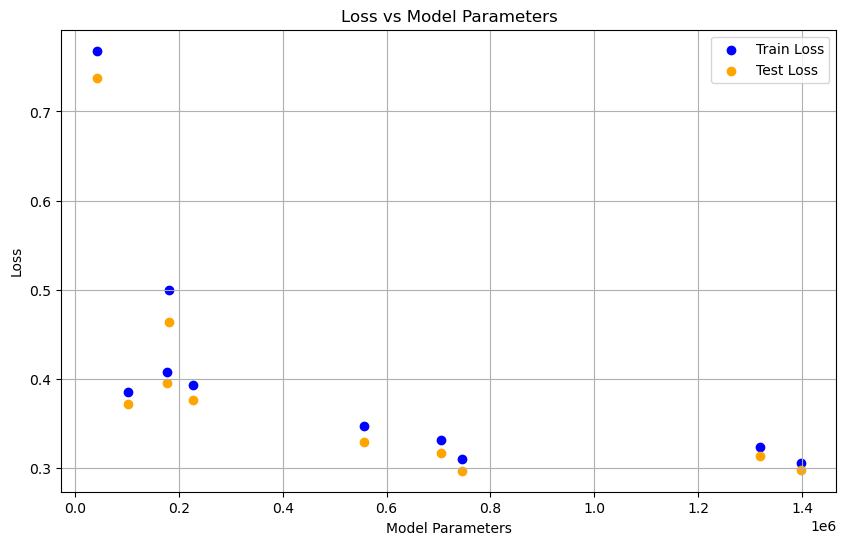

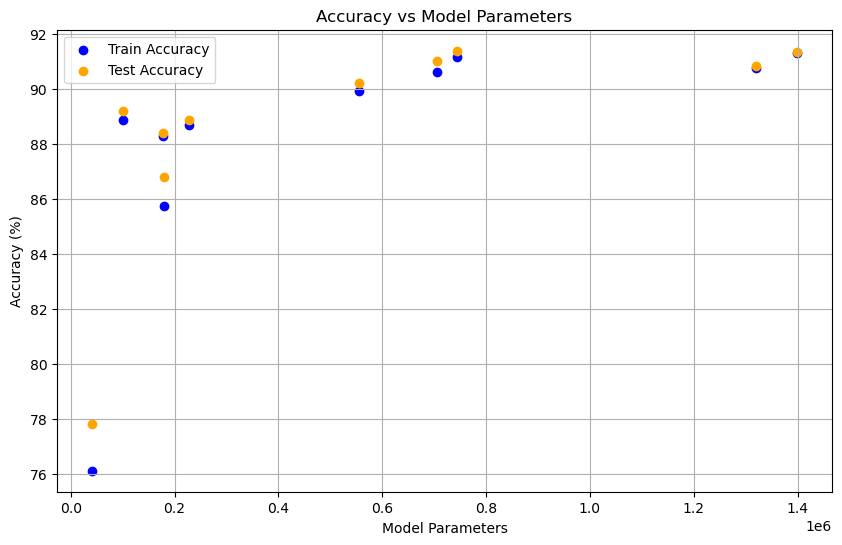

In [46]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(params, trainLosses, label="Train Loss", color='blue')
plt.scatter(params, testLosses, label="Test Loss", color='orange')
plt.xlabel('Model Parameters')
plt.ylabel('Loss')
plt.title('Loss vs Model Parameters')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(params, trainAccs, label="Train Accuracy", color='blue')
plt.scatter(params, testAccs, label="Test Accuracy", color='orange')
plt.xlabel('Model Parameters')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Model Parameters')
plt.legend()
plt.grid(True)
plt.show()

Flatness vs. Generalization

In [47]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import copy
import numpy as np
import matplotlib.pyplot as plt

# Interpolate function
def interpolate_models(model1, model2, alpha):
    model_interp = copy.deepcopy(model1)
    with torch.no_grad():
        for param1, param2, param_interp in zip(model1.parameters(), model2.parameters(), model_interp.parameters()):
            param_interp.data = (1 - alpha) * param1.data + alpha * param2.data
    return model_interp

# Training function
def Train(dnn, train_loader, num_epoch=25, lr=1e-3, batch_size=64):
    optimizer = optim.SGD(dnn.parameters(), lr=lr, momentum=0.9)
    loss_function = nn.CrossEntropyLoss()

    avg_losses = []
    avg_accs = []

    for epoch in range(num_epoch):
        dnn.train()
        total_loss = 0.0
        correct = 0
        total = 0

        for imgs, labels in train_loader:
            optimizer.zero_grad()
            output = dnn(imgs)
            loss = loss_function(output, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_loss = total_loss / len(train_loader)
        avg_acc = 100.0 * correct / total
        avg_losses.append(avg_loss)
        avg_accs.append(avg_acc)
        print(f'Epoch {epoch+1}/{num_epoch}, Loss: {avg_loss:.4f}, Acc: {avg_acc:.2f}')

    return avg_losses, avg_accs

# Testing function
def Test(dnn, test_loader):
    dnn.eval()
    loss_function = nn.CrossEntropyLoss()

    correct = 0
    total = 0
    total_loss = 0.0

    with torch.no_grad():
        for imgs, labels in test_loader:
            output = dnn(imgs)
            loss = loss_function(output, labels)
            total_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(test_loader)
    avg_acc = 100.0 * correct / total

    return avg_loss, avg_acc

# Train
def train_two_models(train, ModelClass, config1, config2):
    # Model 1: Configuration 1
    train_loader1 = torch.utils.data.DataLoader(train, batch_size=config1['batch_size'], shuffle=True)
    m1 = ModelClass()
    optimizer1 = optim.Adam(m1.parameters(), lr=config1['lr'])
    train_loss1, train_acc1 = Train(m1, train_loader1, lr=config1['lr'], batch_size=config1['batch_size'])

    # Model 2: Configuration 2
    train_loader2 = torch.utils.data.DataLoader(train, batch_size=config2['batch_size'], shuffle=True)
    m2 = ModelClass()
    optimizer2 = optim.Adam(m2.parameters(), lr=config2['lr'])
    train_loss2, train_acc2 = Train(m2, train_loader2, lr=config2['lr'], batch_size=config2['batch_size'])

    return m1, m2, train_loader1, train_loader2


# Interpolate
def interpolate_and_log(m1, m2, train_loader, test_loader, alphas):
    train_losses, train_accs, test_losses, test_accs = [], [], [], []

    for alpha in alphas:
        # Interpolate between models
        interpolated_model = interpolate_models(m1, m2, alpha)

        # Evaluate on the test set
        test_loss, test_acc = Test(interpolated_model, test_loader)
        test_losses.append(test_loss)
        test_accs.append(test_acc)

        # Evaluate on the training set
        train_loss, train_acc = Test(interpolated_model, train_loader)
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        print(f'Alpha {alpha}: Train Loss = {train_loss:.4f}, Train Accuracy = {train_acc:.2f}%, Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.2f}%')

    return train_losses, train_accs, test_losses, test_accs

def plot_results(alphas, train_losses, test_losses, train_accs, test_accs, title):
    plt.figure(figsize=(10, 6))

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('alpha')
    ax1.set_ylabel('cross_entropy', color=color)
    ax1.plot(alphas, train_losses, 'r-', label="train", linewidth=2)
    ax1.plot(alphas, test_losses, 'r--', label="test", linewidth=2)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)
    ax2.plot(alphas, train_accs, 'b-', label="train", linewidth=2)
    ax2.plot(alphas, test_accs, 'b--', label="test", linewidth=2)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(title)
    plt.show()





In [48]:
# Transform
transform = transforms.Compose([transforms.ToTensor()])

# Train Data
train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Test Data
test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Test Data Loader
test_loader = torch.utils.data.DataLoader(test, batch_size=100, shuffle=False)

Epoch 1/25, Loss: 2.2987, Acc: 14.52
Epoch 2/25, Loss: 2.2435, Acc: 27.45
Epoch 3/25, Loss: 1.3078, Acc: 58.88
Epoch 4/25, Loss: 0.6123, Acc: 81.56
Epoch 5/25, Loss: 0.4579, Acc: 86.85
Epoch 6/25, Loss: 0.3840, Acc: 89.05
Epoch 7/25, Loss: 0.3203, Acc: 90.89
Epoch 8/25, Loss: 0.2714, Acc: 92.29
Epoch 9/25, Loss: 0.2340, Acc: 93.35
Epoch 10/25, Loss: 0.2048, Acc: 94.16
Epoch 11/25, Loss: 0.1834, Acc: 94.73
Epoch 12/25, Loss: 0.1638, Acc: 95.30
Epoch 13/25, Loss: 0.1511, Acc: 95.63
Epoch 14/25, Loss: 0.1379, Acc: 96.11
Epoch 15/25, Loss: 0.1271, Acc: 96.30
Epoch 16/25, Loss: 0.1163, Acc: 96.68
Epoch 17/25, Loss: 0.1074, Acc: 96.97
Epoch 18/25, Loss: 0.0989, Acc: 97.21
Epoch 19/25, Loss: 0.0919, Acc: 97.37
Epoch 20/25, Loss: 0.0850, Acc: 97.60
Epoch 21/25, Loss: 0.0787, Acc: 97.77
Epoch 22/25, Loss: 0.0729, Acc: 97.97
Epoch 23/25, Loss: 0.0671, Acc: 98.08
Epoch 24/25, Loss: 0.0628, Acc: 98.30
Epoch 25/25, Loss: 0.0582, Acc: 98.39
Epoch 1/25, Loss: 2.3122, Acc: 8.86
Epoch 2/25, Loss: 2.309

<Figure size 1000x600 with 0 Axes>

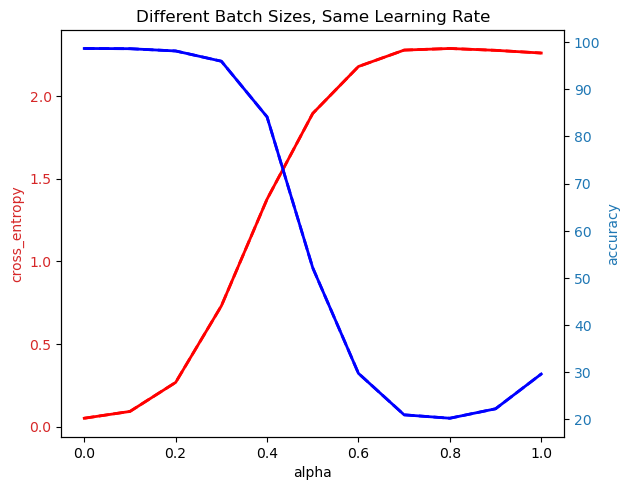

Epoch 1/25, Loss: 2.3037, Acc: 6.37
Epoch 2/25, Loss: 2.3030, Acc: 6.89
Epoch 3/25, Loss: 2.3022, Acc: 8.65
Epoch 4/25, Loss: 2.3013, Acc: 11.05
Epoch 5/25, Loss: 2.3005, Acc: 11.91
Epoch 6/25, Loss: 2.2998, Acc: 16.43
Epoch 7/25, Loss: 2.2991, Acc: 16.42
Epoch 8/25, Loss: 2.2984, Acc: 12.83
Epoch 9/25, Loss: 2.2976, Acc: 11.39
Epoch 10/25, Loss: 2.2968, Acc: 11.25
Epoch 11/25, Loss: 2.2960, Acc: 11.24
Epoch 12/25, Loss: 2.2952, Acc: 11.24
Epoch 13/25, Loss: 2.2943, Acc: 11.24
Epoch 14/25, Loss: 2.2933, Acc: 11.24
Epoch 15/25, Loss: 2.2922, Acc: 11.24
Epoch 16/25, Loss: 2.2910, Acc: 11.24
Epoch 17/25, Loss: 2.2896, Acc: 11.24
Epoch 18/25, Loss: 2.2881, Acc: 11.24
Epoch 19/25, Loss: 2.2863, Acc: 11.27
Epoch 20/25, Loss: 2.2843, Acc: 11.39
Epoch 21/25, Loss: 2.2821, Acc: 11.69
Epoch 22/25, Loss: 2.2794, Acc: 12.52
Epoch 23/25, Loss: 2.2764, Acc: 14.53
Epoch 24/25, Loss: 2.2727, Acc: 17.78
Epoch 25/25, Loss: 2.2685, Acc: 21.50
Epoch 1/25, Loss: 2.3031, Acc: 9.88
Epoch 2/25, Loss: 2.2850, 

<Figure size 1000x600 with 0 Axes>

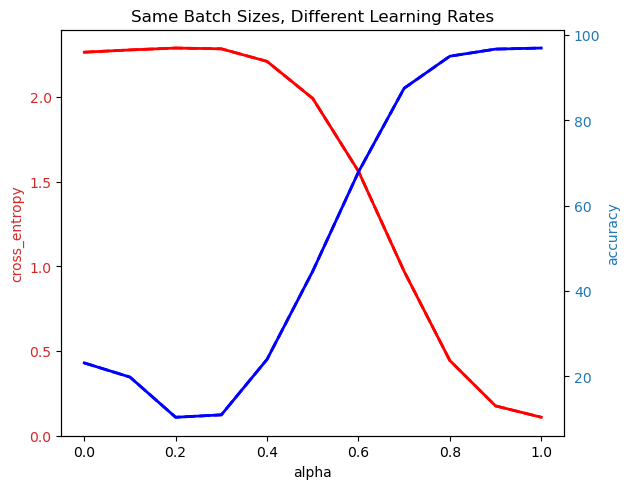

In [49]:
alphas = np.linspace(0, 1, 11)

# Case 1: Different batch sizes (64 vs. 1024)
config1 = {'batch_size': 64, 'lr': 1e-3}
config2 = {'batch_size': 1024, 'lr': 1e-3}
m1, m2, train_loader1, test_loader = train_two_models(train, Model0, config1, config2)

# Interpolate and log results for Case 1
train_losses, train_accs, test_losses, test_accs = interpolate_and_log(m1, m2, train_loader1, test_loader, alphas)
plot_results(alphas, train_losses, test_losses, train_accs, test_accs, 'Different Batch Sizes, Same Learning Rate')

# Case 2: Different Learning Rates (1e-3 vs. 1e-2)
config1 = {'batch_size': 1024, 'lr': 1e-3}
config2 = {'batch_size': 1024, 'lr': 1e-2}
m1, m2, train_loader1, test_loader = train_two_models(train, Model0, config1, config2)

# Interpolate and log results for Case 2
train_losses, train_accs, test_losses, test_accs = interpolate_and_log(m1, m2, train_loader1, test_loader, alphas)
plot_results(alphas, train_losses, test_losses, train_accs, test_accs, 'Same Batch Sizes, Different Learning Rates')